# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Importing different ensemble classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# For model tuning
from sklearn.model_selection import GridSearchCV

#Importing different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the data
visa_data = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/Project 5 - EasyVisa/EasyVisa.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
#making a copy of the dataset to avoid making changes to the original
df = visa_data.copy()

In [ ]:
df.shape

(25480, 12)

There are 12 columns and 25480 observations in the dataset

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


The case_id column contains unique identifiers of each visa application. The dataset contains attributes of the employee and the employer and the case_status column indicates if a visa application was certified or denied

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


There are no null values in the dataset. The columns `no_of_employees`, `yr_of_estab` and `prevailing_wage` are of numerical type whle the other columns including the dependent variable `case_status` are of object type.

The memory usage of the dataset is 2.3 MB. The object type columns can be converted to categories to reduce the space required to store the dataframe

###Data type conversion

In [ ]:
cols = df.select_dtypes('object').columns
cols

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
df[cols] = df[cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


Memory usage reduced from 2.3MB to 2MB

In [ ]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

There are no missing values and no duplicate values

###Statistical summary

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


The mean number of employees in the dataset is 5667 and the median is 2109, the minimum number here is -26 which may be indicative of data entry errors.

Year of establishment ranges from 1800 to 2016

Mean and median prevailing wage are 74455 and 70308 respectively. Also prevailing wage ranges from 2.13 to 319210. This wide range is explained by the different unit of wages in the dataset

In [ ]:
df.describe(include="category").T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


Most of the visa applicants come from Asia

The most common educational qualification is a Bachelor's degree

Most of the employees have job experience

Majority of the employees do not require job training

The most common region of employment is the Northeast

The most common unit of wage is Yearly

Most of the position of work are full time positions

And most of the visa applications were certified

###Checking for negative values in the number of employees column

In [ ]:
df[df["no_of_employees"] < 0].shape

(33, 12)

33 entries were negative numbers

In [ ]:
#converting them to positive using the absolute function
df["no_of_employees"] = abs(df["no_of_employees"])

In [ ]:
df[df["no_of_employees"] < 0].shape

(0, 12)

The negative numbers have been treated

In [ ]:
#dropping the case id column as it is a unique identifier
df.drop("case_id", axis=1, inplace=True)

###Unique values in the categorical columns

In [ ]:
#Printing unique values for each categorical column
cols_cat = df.select_dtypes("category").columns

for col in cols_cat:
  print("Unique values in ",col, "are: ")
  print(df[col].value_counts())
  print("*"*50)

Unique values in  continent are: 
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in  education_of_employee are: 
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in  has_job_experience are: 
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in  requires_job_training are: 
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************************
Unique values in  region_of_employment are: 
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
**

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

###Functions to carry out EDA

In [ ]:
# Function to create histograms and boxplots
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    #Creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )
    # Boxplot will be created and a triangle will indicate the mean value of the column
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    # Adds mean to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    # Adds median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [ ]:
#Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

###Observations on number of employees

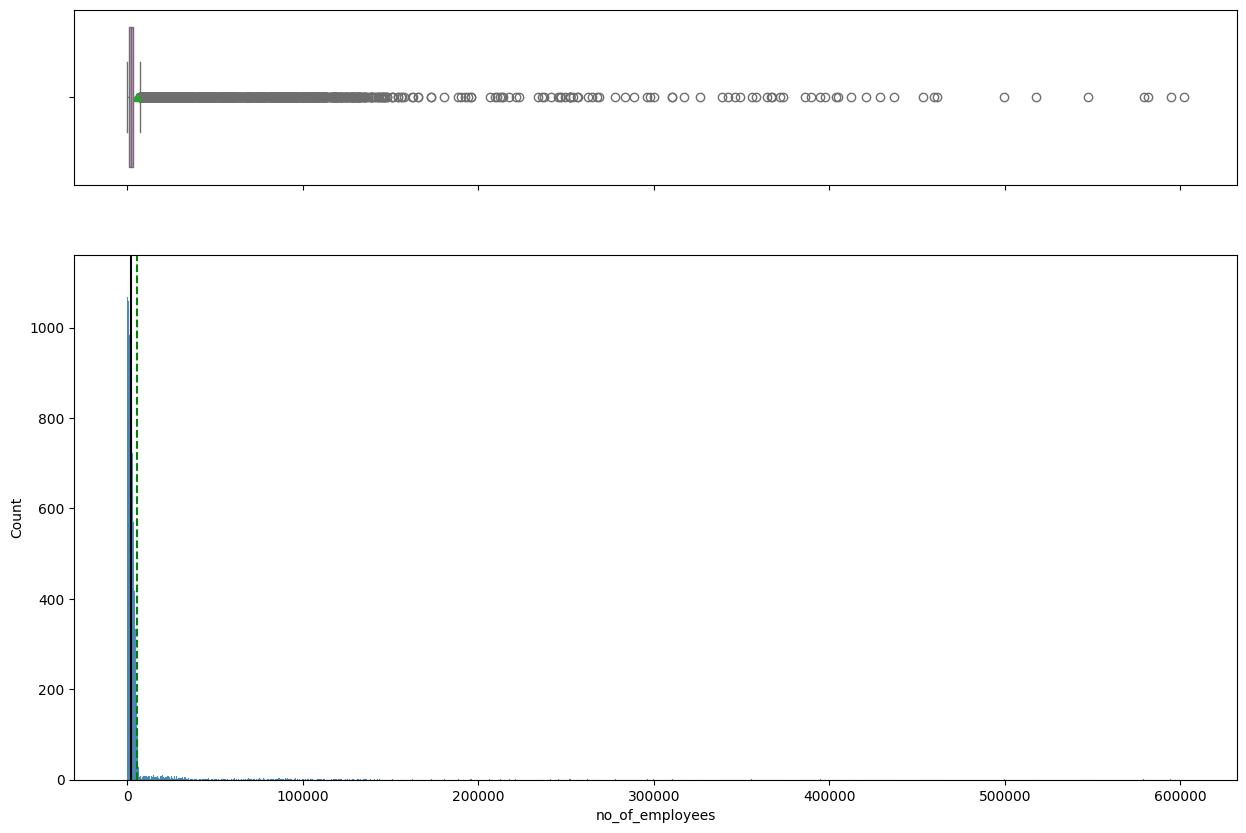

In [ ]:
histogram_boxplot(df, 'no_of_employees')

`no_of_employees`: Distribution is heavily right skewed and there are a lot of outliers

###Observations on prevailing wage

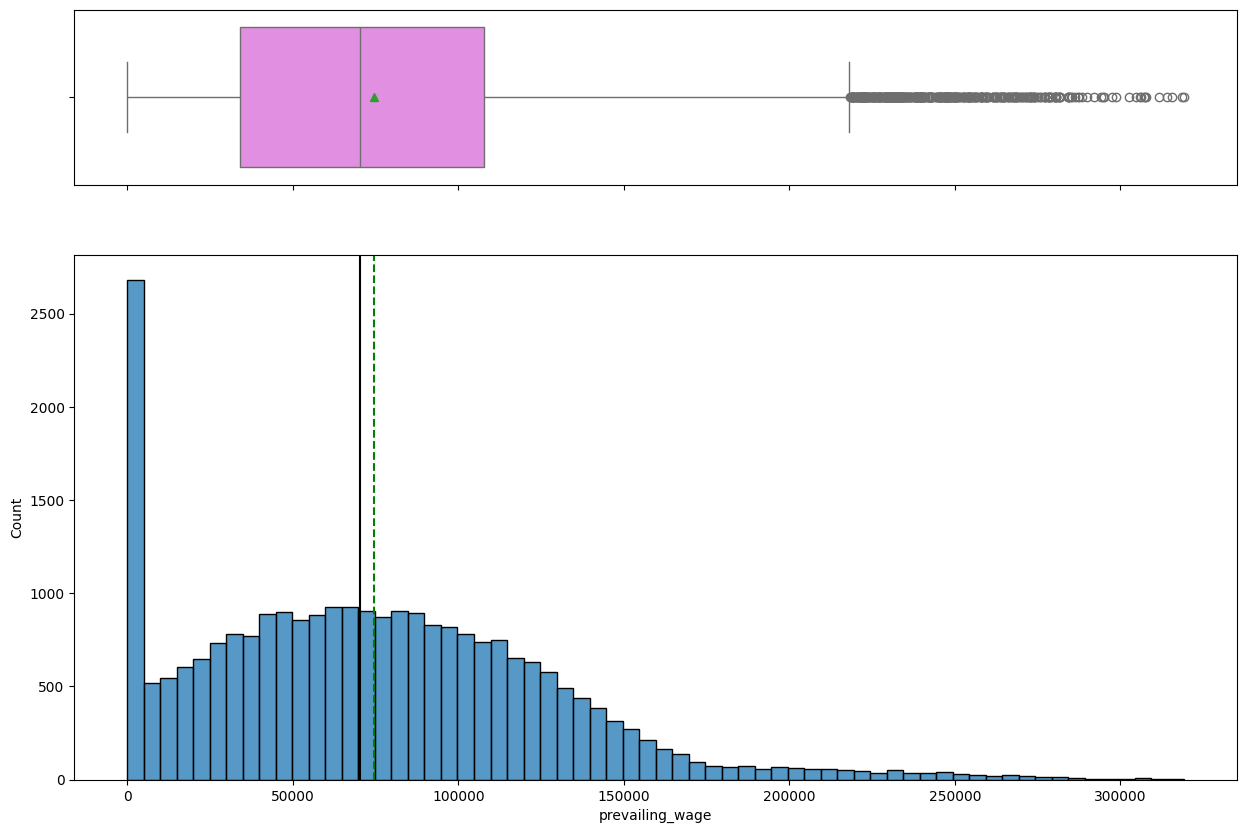

In [ ]:
histogram_boxplot(df, 'prevailing_wage')

`prevailing_wage`: The distribution is right skewed, there are upper outliers

There is a high count of wages that range between 0 and ~5000

<Axes: xlabel='prevailing_wage', ylabel='Count'>

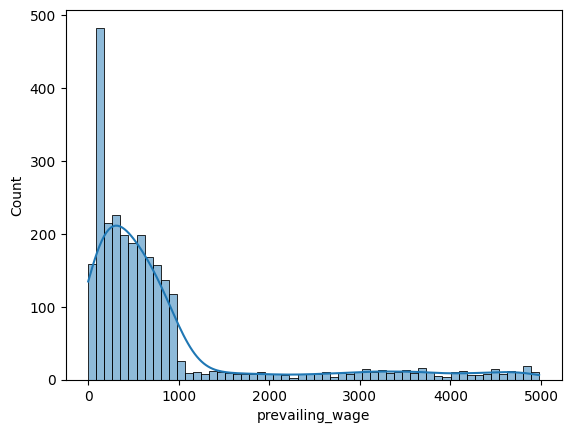

In [ ]:
sns.histplot(df[df["prevailing_wage"] < 5000], x='prevailing_wage', kde=True)

<Axes: xlabel='prevailing_wage', ylabel='Count'>

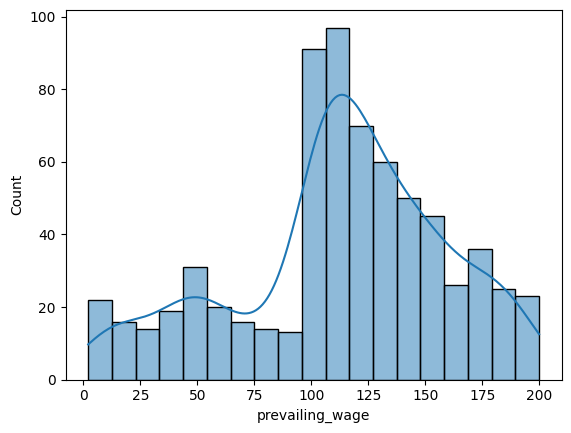

In [ ]:
sns.histplot(df[df["prevailing_wage"] < 200], x='prevailing_wage', kde=True)

In [ ]:
df.loc[df["prevailing_wage"] < 200, "unit_of_wage"].value_counts()

unit_of_wage
Hour     667
Year      21
Month      0
Week       0
Name: count, dtype: int64

Most of these wages are hourly rates

###Observation on year of establishment

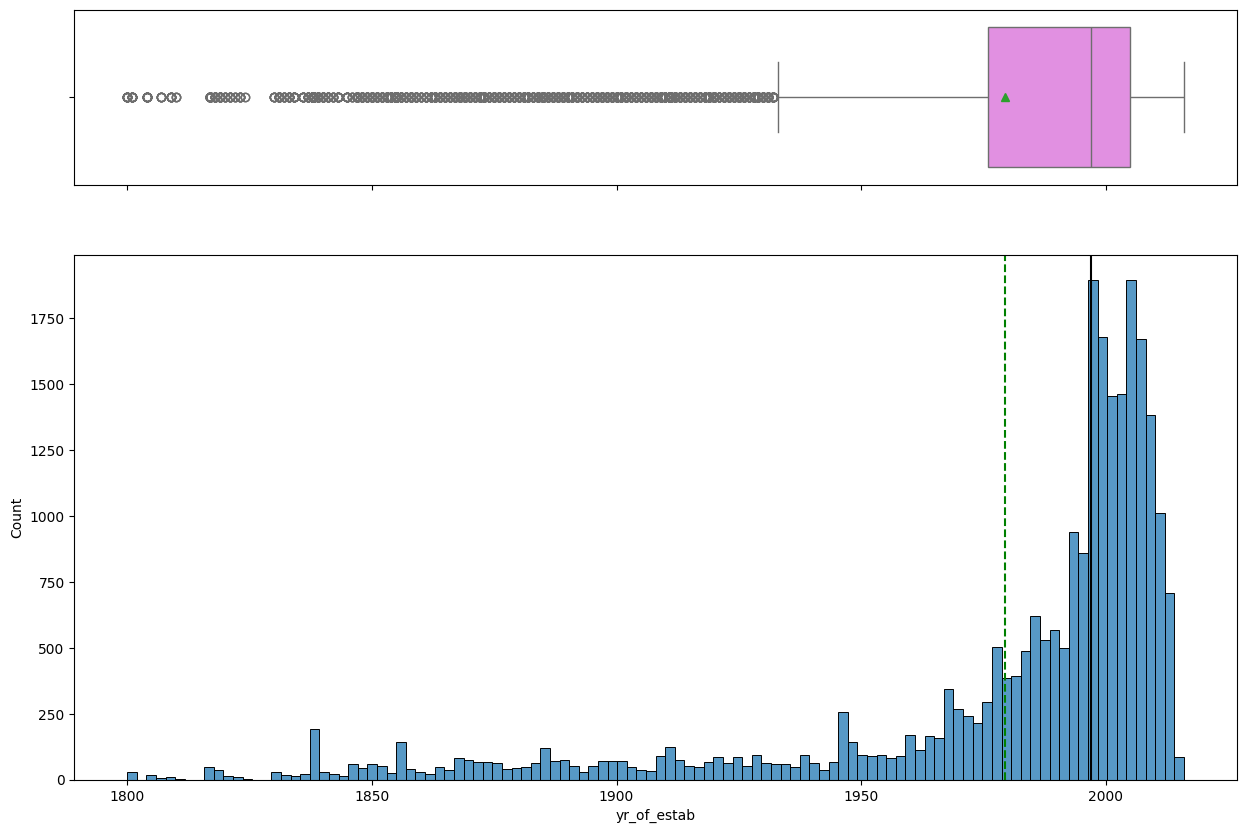

In [ ]:
histogram_boxplot(df, 'yr_of_estab')

`year_of_establishment`: The distribution is left skewed with outliers. A good chunk of companies were established during and after the 90s


###Observation on continent

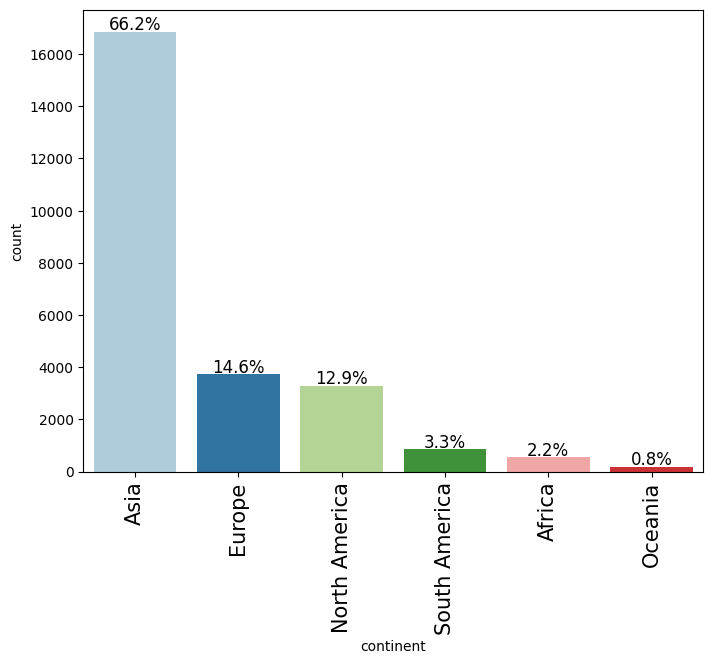

In [ ]:
labeled_barplot(df, 'continent', perc=True)

66.2% of the employees are from Asia

14,6% are Europeans

12.9% are North Americans

3.3% are Africans

0.8% are from Oceania

###Observation on education of employee

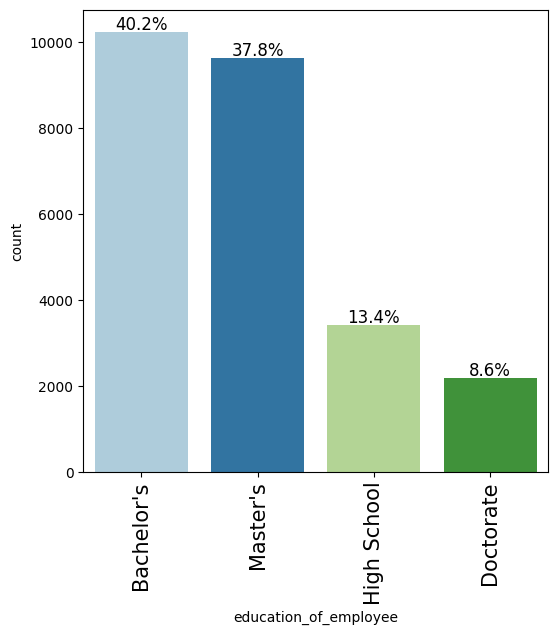

In [ ]:
labeled_barplot(df, 'education_of_employee', perc=True)

40.2% of the employees have a Bachelor's degree

37.8%: Master's Degree

13.4%: High School Diploma

8.6%: Doctorate

###Observations on job experience

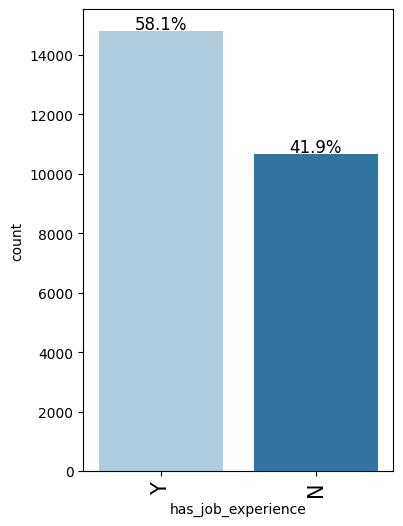

In [ ]:
labeled_barplot(df, 'has_job_experience', perc=True)

58.1% of the employees have job experience while 41.9% do not

###Observations on job training

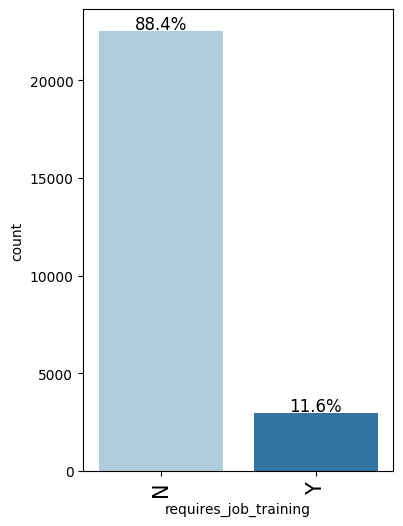

In [ ]:
labeled_barplot(df, 'requires_job_training', perc=True)

88.4% of the employees do not require job training and 11.6% require job training

###Observations on region of employment

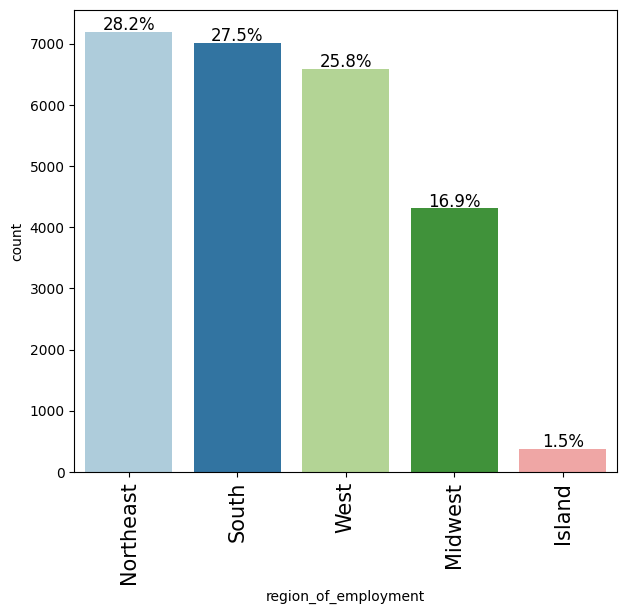

In [ ]:
labeled_barplot(df, 'region_of_employment', perc=True)

Approximately 28% of the region of employment are in the Northeast, 27.5% are in the South, 25,8% are in the West, 16.9% are in the Midwest and 1.5% are on the Island


###Observations on unit of wage

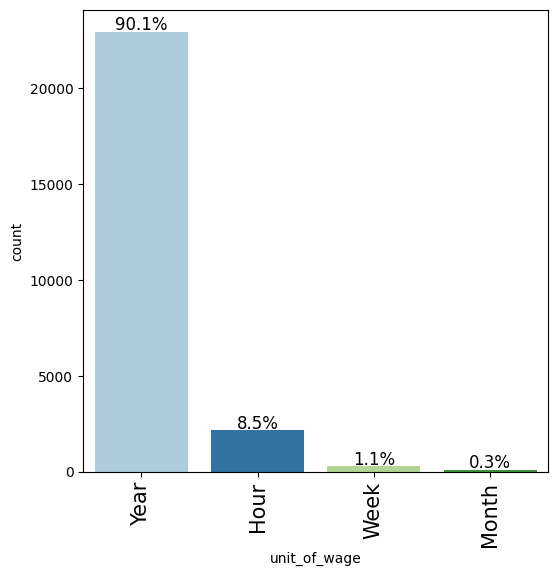

In [ ]:
labeled_barplot(df, 'unit_of_wage', perc=True)

~90% of wages are yearly wages

8.5% are hourly

1.1% are weekly

and 0.3% are monthly wages

###Observations on full time position

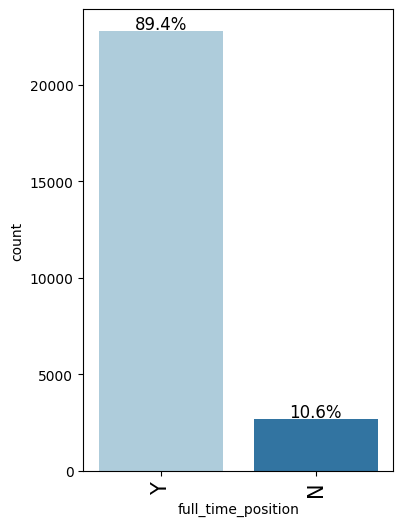

In [ ]:
labeled_barplot(df, 'full_time_position', perc=True)

~89% of the positions were full time positions while 10% were part-time positions

###Observations on case_status

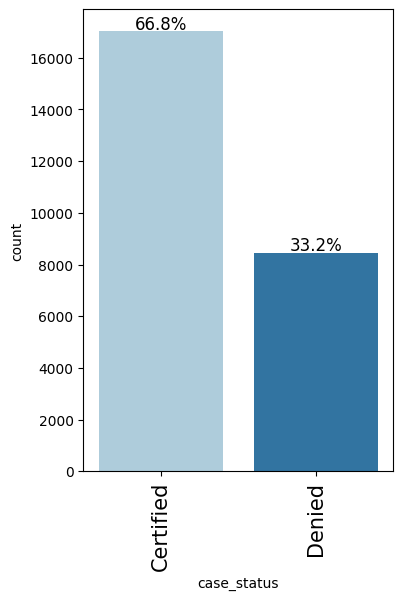

In [ ]:
labeled_barplot(df, 'case_status', perc=True)

66.8% of visa applications were certified while 33.2% were denied

##Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

###Correlation check

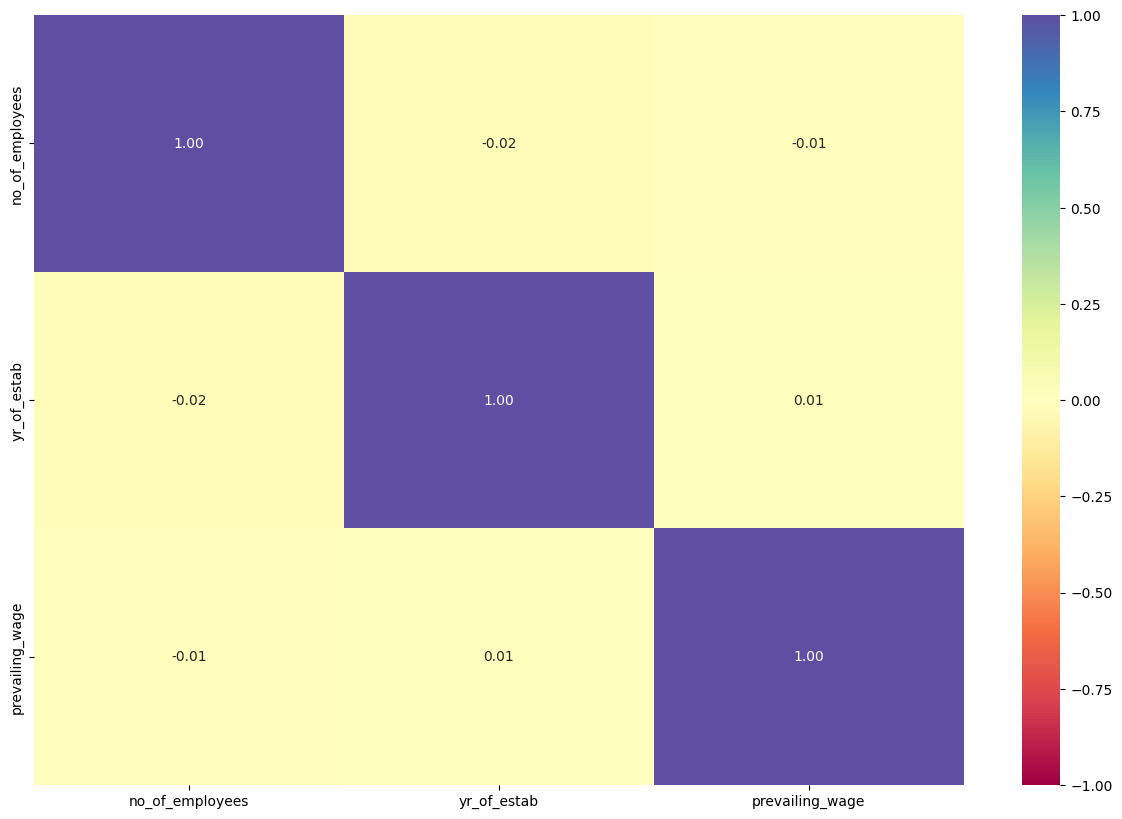

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15,10))
sns.heatmap(df[num_cols].corr(), annot=True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
plt.show()

No correlation among the numerical variables

###Case status vs continent

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


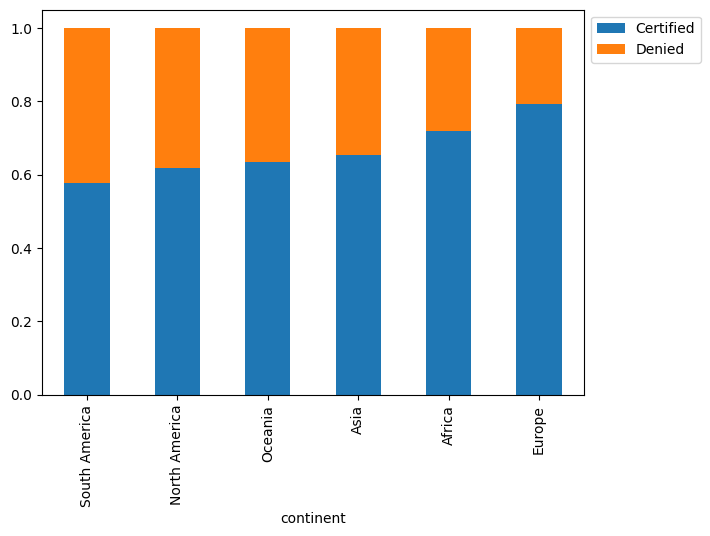

In [ ]:
stacked_barplot(df, 'continent', 'case_status')

South American applicants have the highest proportion of denied visa status at about 42%.
North America is about 38% and Europe is the lowest at ~20%

###Case status vs Education

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


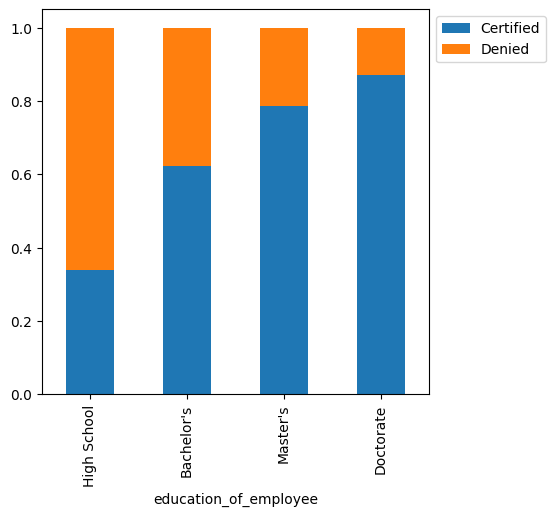

In [ ]:
stacked_barplot(df, 'education_of_employee', 'case_status')

High school level of education has highest proportion of visa denials at about 66%
Bachelor's degree: 40%
Master's: 21%
Doctorate: 13%

The higher the level of education the lesser the proportion of visa denials

###Case status vs Job experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


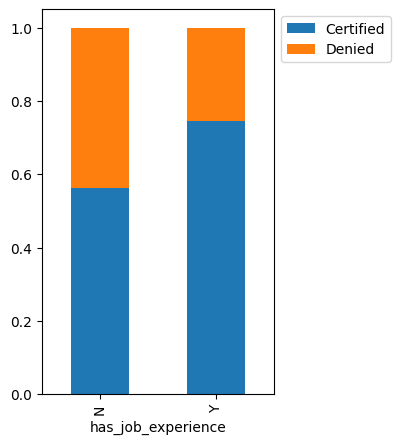

In [ ]:
stacked_barplot(df, 'has_job_experience', 'case_status')

 About 44% of applicant without job experience had their applications denied while only 25% of those with job experience were denied.

Case statuss vs Job training requirements

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


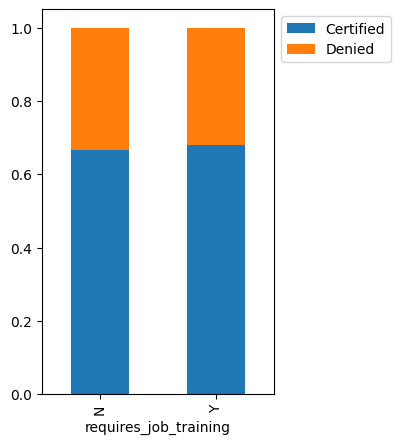

In [ ]:
stacked_barplot(df, 'requires_job_training', 'case_status')

About an equal proportion of both groups had their applications denied

###Case status vs region of employment

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


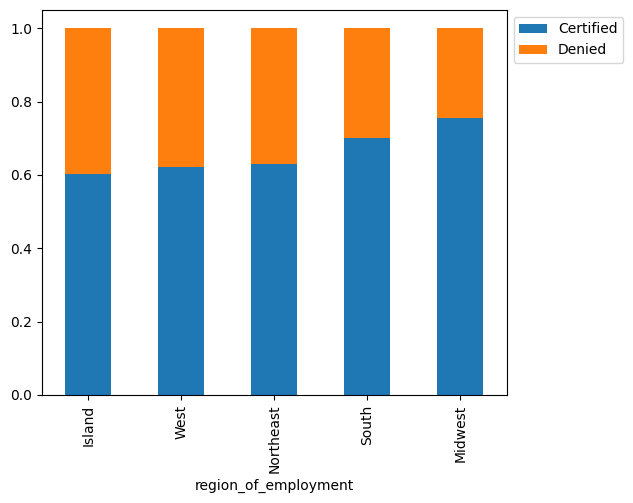

In [ ]:
stacked_barplot(df, 'region_of_employment', 'case_status')

Similar proportion of denied visa among the West, Northeast and Island regions at about 40%

The South is about 30% and the Midwest is about 25%



###Case status vs Unit of wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


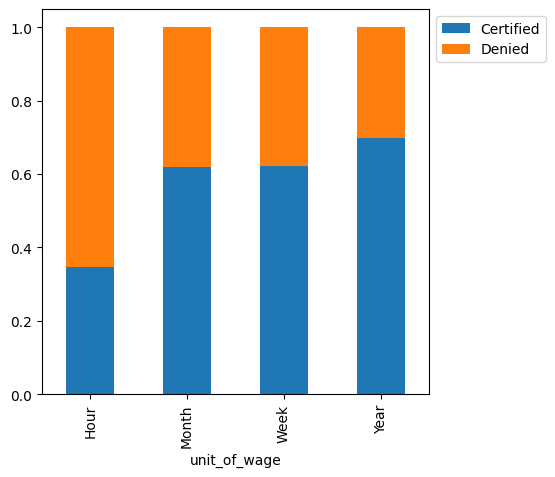

In [ ]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

65% of employees paid hourly wages had their applications denied.

Monthly and Weekly wages is about 40%

Yearly wages is about 30%

###Case status vs full time position

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


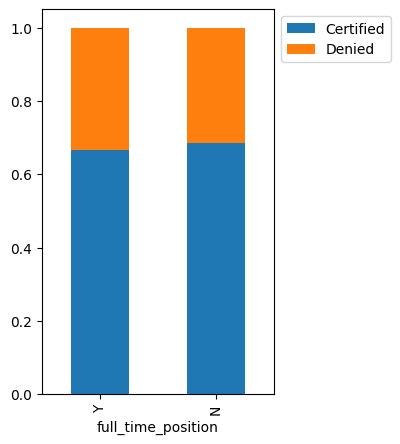

In [ ]:
stacked_barplot(df, 'full_time_position', 'case_status')

An equal proportion (~35%) of both groups had their applications denied

###Case status vs Prevailing wage

<Axes: xlabel='case_status', ylabel='prevailing_wage'>

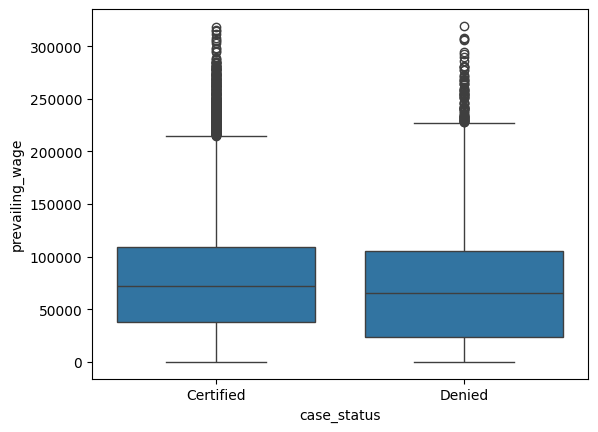

In [ ]:
sns.boxplot(data=df, x="case_status", y="prevailing_wage")

On average, the prevailing wage for the denied visas is slightly lower than the certified visas

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###Outlier detection and treatment

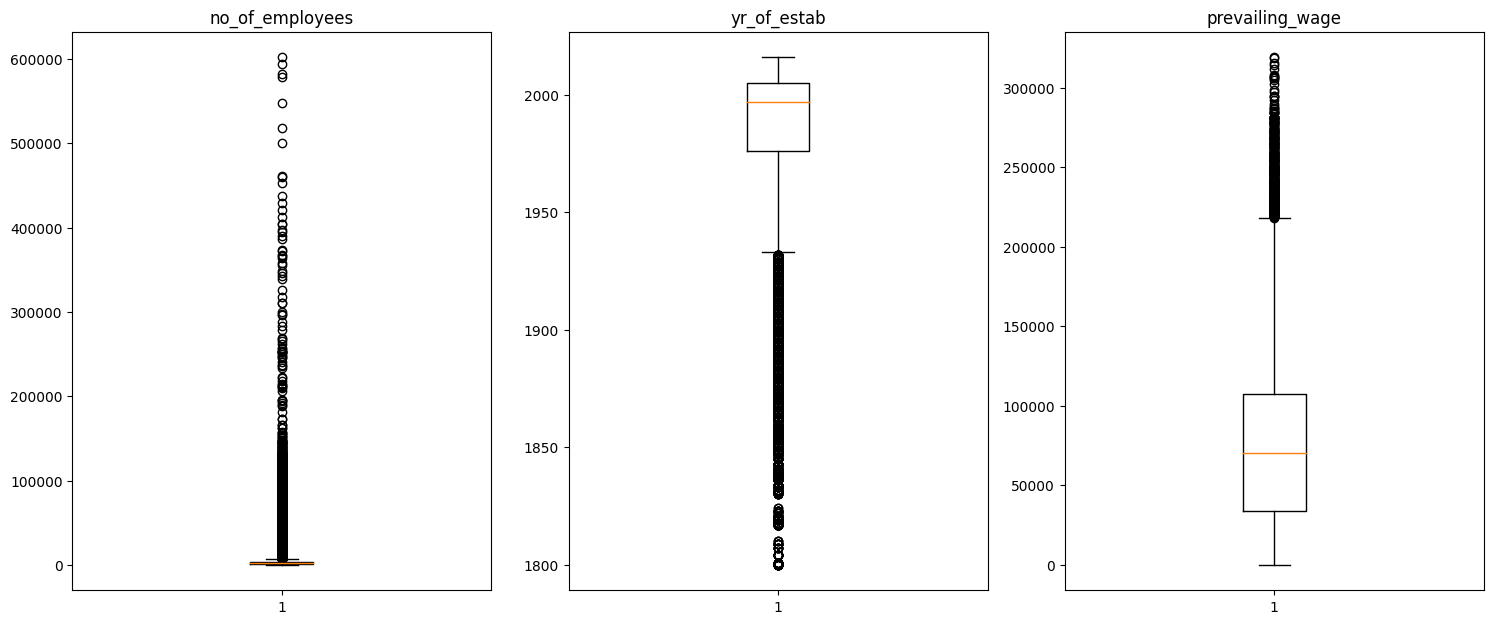

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

There are quite a lot of outliers but they will be left alone as they are real values

###Data preparation for Modeling

**Encoding case status**

In [ ]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

**Creating training and testing sets**

In [ ]:
#specifying the independent and dependent variables
X = df.drop(["case_status"], axis = 1)
y = df["case_status"]

#creating dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)

#splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


The distribution of classes of the dependent variable `case_status` had been preserved in the training and testing sets

##**Model performance evaluation**

Possible wrong predictions:


*   Predicting a visa application will get certified but in reality it should be denied
*   Predicting a visa application will get denied but in reality it should be certified


Both cases are important because:

1.   If a visa application that should be denied gets certified, the wrong employee gets the job instead of someone possibly more qualified and capable.
2.   If a visa application that should be certified gets denied, then an employee who would have added value to the company and, by extension, the United States, would not be given the opportunity.


Reducing losses:

As both the False Positives and False negatives need to be minimized, the metric to be maximized is the **F1 Score**










###Functions for calculating metrics and creating the confusion matrix

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##Decision tree model

In [ ]:
#class_weight set as balanced to reduce bias as both classes are important
dec_tree = DecisionTreeClassifier(class_weight = "balanced", random_state=1)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

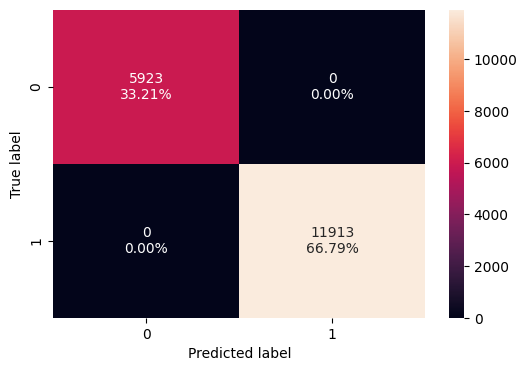

In [ ]:
confusion_matrix_sklearn(dec_tree, X_train, y_train)

In [ ]:
dec_tree_perf_train = model_performance_classification_sklearn(dec_tree, X_train, y_train)
dec_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


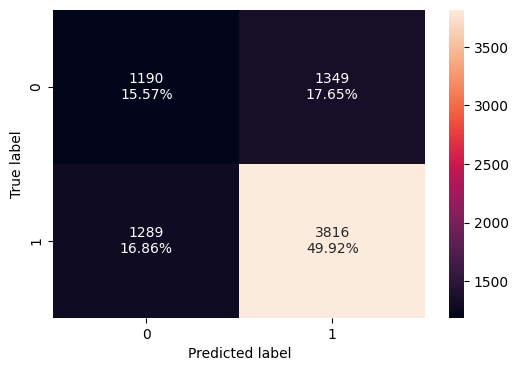

In [ ]:
confusion_matrix_sklearn(dec_tree, X_test, y_test)

In [ ]:
dec_tree_perf_test = model_performance_classification_sklearn(dec_tree, X_test, y_test)
dec_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.654893,0.747502,0.738819,0.743135


The decision tree model is overfitting on the training data

###Decision tree Hyperparameter tuning

In [ ]:
dec_tree_tuned = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dec_tree_tuned, param_grid, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dec_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dec_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

In [ ]:
dec_tree_tuned_perf_train = model_performance_classification_sklearn(dec_tree_tuned, X_train, y_train)
dec_tree_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.710193,0.725762,0.819681,0.769868


In [ ]:
dec_tree_tuned_perf_test = model_performance_classification_sklearn(dec_tree_tuned, X_test, y_test)
dec_tree_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.707483,0.726543,0.815344,0.768386


The model is no longer overfitting and the F1 score of the testing performance has increased by 2%

###Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

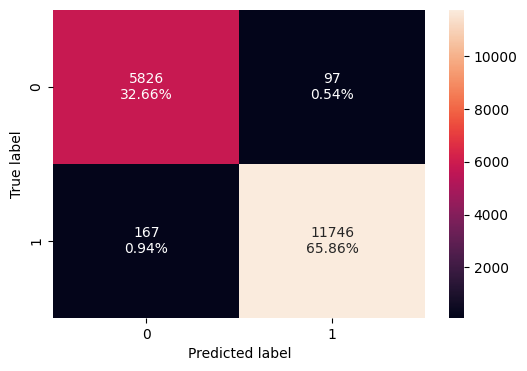

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
bagging_perf_train = model_performance_classification_sklearn(bagging, X_train, y_train)
bagging_perf_train

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


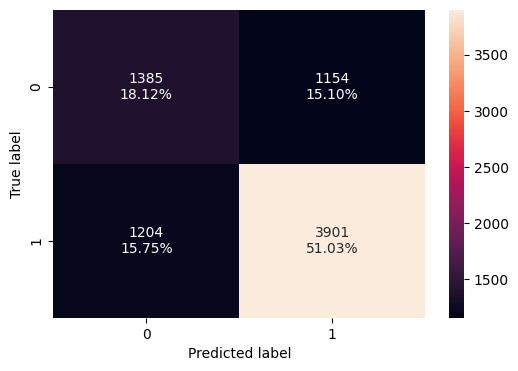

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_perf_test = model_performance_classification_sklearn(bagging, X_test, y_test)
bagging_perf_test

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


The Bagging classifier is overfitting on the training data

###Bagging Classifier Hyperparameter tuning

In [ ]:
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, param_grid, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [ ]:
bagging_tuned_perf_train = model_performance_classification_sklearn(bagging_tuned, X_train, y_train)
bagging_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.99871,0.999916,0.998157,0.999036


In [ ]:
bagging_tuned_perf_test = model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
bagging_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.725929,0.888737,0.748186,0.812427


The tuned bagging classifier has a greater F1 score but it is still overfitting on the training set

###Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

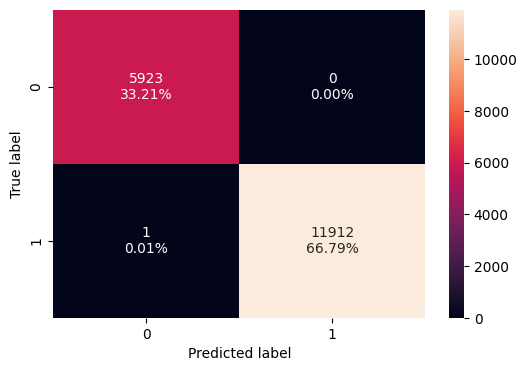

In [ ]:
confusion_matrix_sklearn(rf_model, X_train, y_train)

In [ ]:
rf_model_perf_train = model_performance_classification_sklearn(rf_model, X_train, y_train)
rf_model_perf_train

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


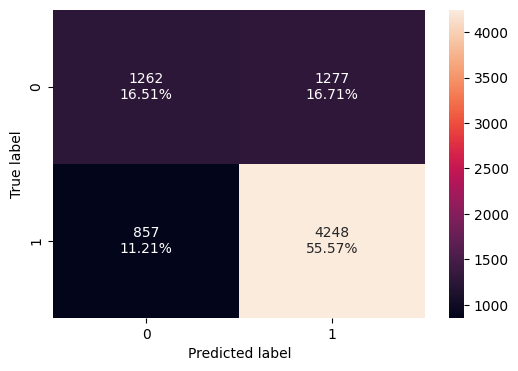

In [ ]:
confusion_matrix_sklearn(rf_model, X_test, y_test)

In [ ]:
rf_model_perf_test = model_performance_classification_sklearn(rf_model, X_test, y_test)
rf_model_perf_test

,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


The random forest model is overfitting on the training data

###Random Forest Hyperparameter tuning

In [ ]:
rf_model_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_model_tuned, param_grid, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_model_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

In [ ]:
rf_model_tuned_perf_train = model_performance_classification_sklearn(rf_model_tuned, X_train, y_train)
rf_model_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.795582,0.909091,0.808631,0.855923


In [ ]:
rf_model_tuned_perf_test = model_performance_classification_sklearn(rf_model_tuned, X_test, y_test)
rf_model_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.743066,0.873849,0.771666,0.819585


The tuned random forest model generalizes well on the training set and the F1 score is quite high

###AdaBoost Model

In [ ]:
ada_model = AdaBoostClassifier(random_state=1)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

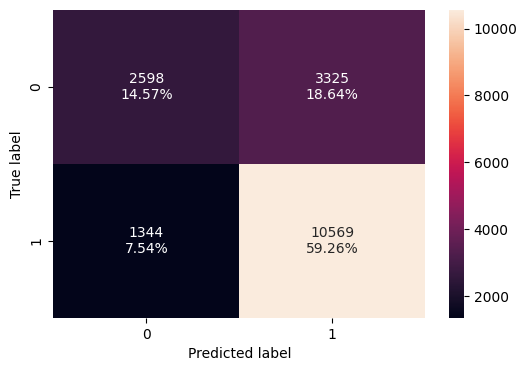

In [ ]:
confusion_matrix_sklearn(ada_model, X_train, y_train)

In [ ]:
ada_model_perf_train = model_performance_classification_sklearn(ada_model, X_train, y_train)
ada_model_perf_train

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


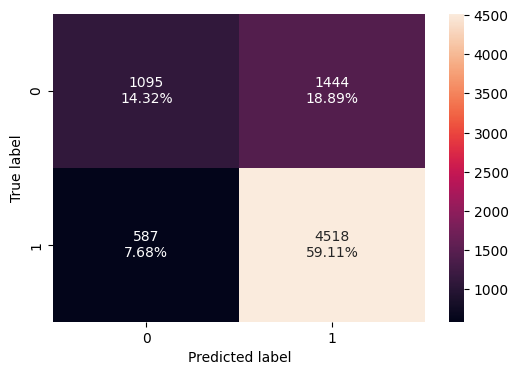

In [ ]:
confusion_matrix_sklearn(ada_model, X_test, y_test)

In [ ]:
ada_model_perf_test = model_performance_classification_sklearn(ada_model, X_test, y_test)
ada_model_perf_test

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


The AdaBoost model generalizes well on the test set and the F1 score is 0.81

###AdaBoost - Hyperparameter tuning

In [ ]:
ada_model_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ada_model_tuned, param_grid, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ada_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_model_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

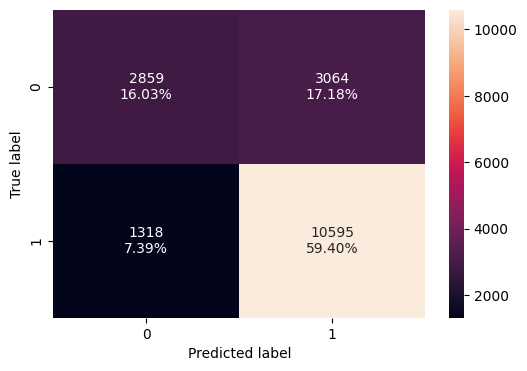

In [ ]:
confusion_matrix_sklearn(ada_model_tuned, X_train, y_train)

In [ ]:
ada_model_tuned_perf_train = model_performance_classification_sklearn(ada_model_tuned, X_train, y_train)
ada_model_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.754317,0.889365,0.775679,0.828641


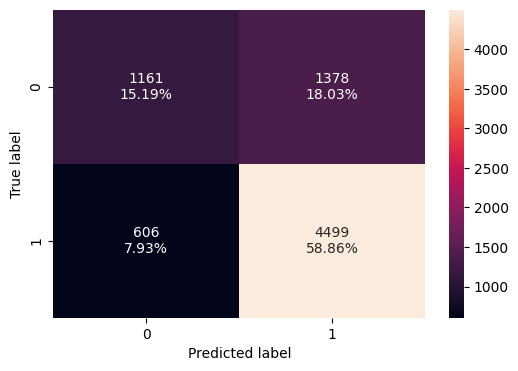

In [ ]:
confusion_matrix_sklearn(ada_model_tuned, X_test, y_test)

In [ ]:
ada_model_tuned_perf_test = model_performance_classification_sklearn(ada_model_tuned, X_test, y_test)
ada_model_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.74045,0.881293,0.765527,0.819341


The tuned AdaBoost Model performs slightly better

###Gradient Boost Model

In [ ]:
gb_model = GradientBoostingClassifier(random_state=1)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

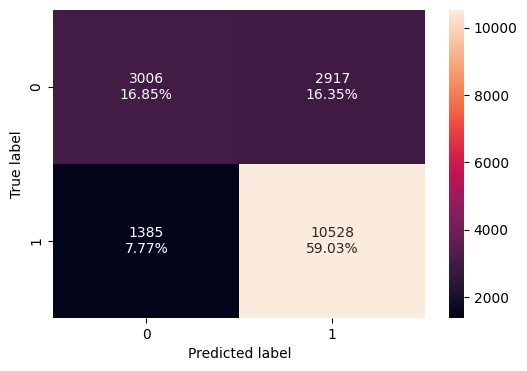

In [ ]:
confusion_matrix_sklearn(gb_model, X_train, y_train)

In [ ]:
gb_model_perf_train = model_performance_classification_sklearn(gb_model, X_train, y_train)
gb_model_perf_train

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


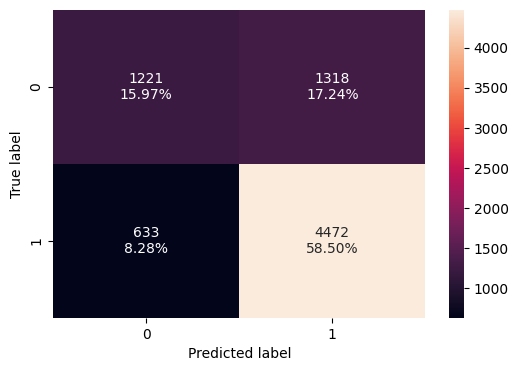

In [ ]:
confusion_matrix_sklearn(gb_model, X_test, y_test)

In [ ]:
gb_model_perf_test = model_performance_classification_sklearn(gb_model, X_test, y_test)
gb_model_perf_test

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


The Gradient Boost model is not overfitting and it performs better than the AdaBoost model

###Gradient Boosting - Hyperparameter tuning

In [ ]:
gb_model_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_model_tuned, param_grid, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_model_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.9)

In [ ]:
gb_model_tuned_perf_train = model_performance_classification_sklearn(gb_model_tuned, X_train, y_train)
gb_model_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.753756,0.883992,0.777712,0.827453


In [ ]:
gb_model_tuned_perf_test = model_performance_classification_sklearn(gb_model_tuned, X_test, y_test)
gb_model_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.742936,0.878355,0.769389,0.820269


The tuned Gradient Boost model generalizes well on the testing data

###XGBoost Model

In [ ]:
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

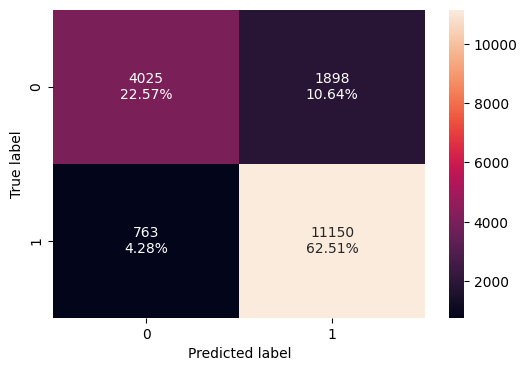

In [ ]:
confusion_matrix_sklearn(xgb_model, X_train, y_train)

In [ ]:
xgb_model_perf_train = model_performance_classification_sklearn(xgb_model, X_train, y_train)
xgb_model_perf_train

,Accuracy,Recall,Precision,F1
0,0.850807,0.935952,0.854537,0.893394


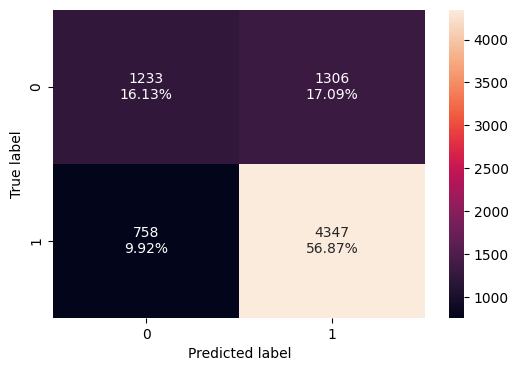

In [ ]:
confusion_matrix_sklearn(xgb_model, X_test, y_test)

In [ ]:
xgb_model_perf_test = model_performance_classification_sklearn(xgb_model, X_test, y_test)
xgb_model_perf_test

,Accuracy,Recall,Precision,F1
0,0.729984,0.851518,0.768972,0.808143


The XGBoost model is overfitting on the training data

###XGBoost - Hyperparameter tuning

In [ ]:
xgb_model_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_model_tuned, param_grid, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_model_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_model_tuned_perf_train = model_performance_classification_sklearn(xgb_model_tuned, X_train, y_train)
xgb_model_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.76211,0.888189,0.784243,0.832986


In [ ]:
xgb_model_tuned_perf_test = model_performance_classification_sklearn(xgb_model_tuned, X_test, y_test)
xgb_model_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.744898,0.877767,0.771655,0.821298


###Stacking Model

**Building a stacking model with the tuned models: Random Forest, AdaBoost and Gradient Boost, then using XGBoost to make final predictions**

In [ ]:
estimators = [("Random Forest", rf_model_tuned), ("AdaBoost", ada_model_tuned),
              ("Gradient Boost", gb_model_tuned)]
final_estimator = xgb_model_tuned

In [ ]:
stacking_estimator = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stacking_estimator.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Random Forest',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   random_state=1)),
                               ('Gradient Boost',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

In [ ]:
stacking_estimator_perf_train = model_performance_classification_sklearn(stacking_estimator, X_train, y_train)
stacking_estimator_perf_train

,Accuracy,Recall,Precision,F1
0,0.771249,0.892722,0.791471,0.839053


In [ ]:
stacking_estimator_perf_test = model_performance_classification_sklearn(stacking_estimator, X_test, y_test)
stacking_estimator_perf_test

,Accuracy,Recall,Precision,F1
0,0.743982,0.876004,0.771567,0.820475


##Comparing all the models

In [ ]:
#training performance comparison

models_train_perf = pd.concat([dec_tree_perf_train.T, dec_tree_tuned_perf_train.T, bagging_perf_train.T, bagging_tuned_perf_train.T, rf_model_perf_train.T,
                               rf_model_tuned_perf_train.T, ada_model_perf_train.T, ada_model_tuned_perf_train.T, gb_model_perf_train.T,
                               gb_model_tuned_perf_train.T, xgb_model_perf_train.T, xgb_model_tuned_perf_train.T, stacking_estimator_perf_train.T],
                              axis=1)
models_train_perf.columns = ["Decision Tree",
                             "Decision Tree Tuned",
                             "Bagging",
                             "Bagging Tuned",
                             "Random Forest",
                             "Random Forest Tuned",
                             "AdaBoost",
                             "AdaBoost Tuned",
                             "Gradient Boost",
                             "Gradient Boost Tuned",
                             "XGBoost",
                             "XGBoost Tuned",
                             "Stacking"
                             ]

print("Training performance comparison")
models_train_perf

Training performance comparison


,Decision Tree,Decision Tree Tuned,Bagging,Bagging Tuned,Random Forest,Random Forest Tuned,AdaBoost,AdaBoost Tuned,Gradient Boost,Gradient Boost Tuned,XGBoost,XGBoost Tuned,Stacking
Accuracy,1.0,0.710193,0.985198,0.998710,0.999944,0.795582,0.738226,0.754317,0.758802,0.753756,0.850807,0.762110,0.771249
Recall,1.0,0.725762,0.985982,0.999916,0.999916,0.909091,0.887182,0.889365,0.883740,0.883992,0.935952,0.888189,0.892722
Precision,1.0,0.819681,0.991810,0.998157,1.000000,0.808631,0.760688,0.775679,0.783042,0.777712,0.854537,0.784243,0.791471
F1,1.0,0.769868,0.988887,0.999036,0.999958,0.855923,0.819080,0.828641,0.830349,0.827453,0.893394,0.832986,0.839053


In [ ]:
#testing performance comparison

models_test_perf = pd.concat([dec_tree_perf_test.T, dec_tree_tuned_perf_test.T, bagging_perf_test.T, bagging_tuned_perf_test.T, rf_model_perf_test.T,
                               rf_model_tuned_perf_test.T, ada_model_perf_test.T, ada_model_tuned_perf_test.T, gb_model_perf_test.T,
                               gb_model_tuned_perf_test.T, xgb_model_perf_test.T, xgb_model_tuned_perf_test.T, stacking_estimator_perf_test.T],
                              axis=1)
models_test_perf.columns = ["Decision Tree",
                             "Decision Tree Tuned",
                             "Bagging",
                             "Bagging Tuned",
                             "Random Forest",
                             "Random Forest Tuned",
                             "AdaBoost",
                             "AdaBoost Tuned",
                             "Gradient Boost",
                             "Gradient Boost Tuned",
                             "XGBoost",
                             "XGBoost Tuned",
                             "Stacking"
                             ]

print("Testing performance comparison")
models_test_perf

Testing performance comparison


,Decision Tree,Decision Tree Tuned,Bagging,Bagging Tuned,Random Forest,Random Forest Tuned,AdaBoost,AdaBoost Tuned,Gradient Boost,Gradient Boost Tuned,XGBoost,XGBoost Tuned,Stacking
Accuracy,0.654893,0.707483,0.691523,0.725929,0.720827,0.743066,0.734301,0.740450,0.744767,0.742936,0.729984,0.744898,0.743982
Recall,0.747502,0.726543,0.764153,0.888737,0.832125,0.873849,0.885015,0.881293,0.876004,0.878355,0.851518,0.877767,0.876004
Precision,0.738819,0.815344,0.771711,0.748186,0.768869,0.771666,0.757799,0.765527,0.772366,0.769389,0.768972,0.771655,0.771567
F1,0.743135,0.768386,0.767913,0.812427,0.799247,0.819585,0.816481,0.819341,0.820927,0.820269,0.808143,0.821298,0.820475


The tuned XGBoost model is the best performing model as it has the highest F1 score

##Feature Importance of final model

In [ ]:
print(pd.DataFrame(xgb_model_tuned.feature_importances_,
                   columns = ["Importance"], index = X_train.columns).sort_values(by = "Importance", ascending = False))

                                   Importance
education_of_employee_High School    0.402008
has_job_experience_Y                 0.126927
education_of_employee_Master's       0.073238
education_of_employee_Doctorate      0.060986
continent_Europe                     0.051092
unit_of_wage_Year                    0.047358
region_of_employment_Midwest         0.036367
region_of_employment_South           0.028912
prevailing_wage                      0.022518
full_time_position_Y                 0.020815
region_of_employment_Northeast       0.020383
region_of_employment_West            0.016921
continent_Asia                       0.015345
continent_South America              0.013509
continent_North America              0.013096
requires_job_training_Y              0.012313
unit_of_wage_Week                    0.008181
yr_of_estab                          0.008017
continent_Oceania                    0.007809
no_of_employees                      0.007194
unit_of_wage_Month                

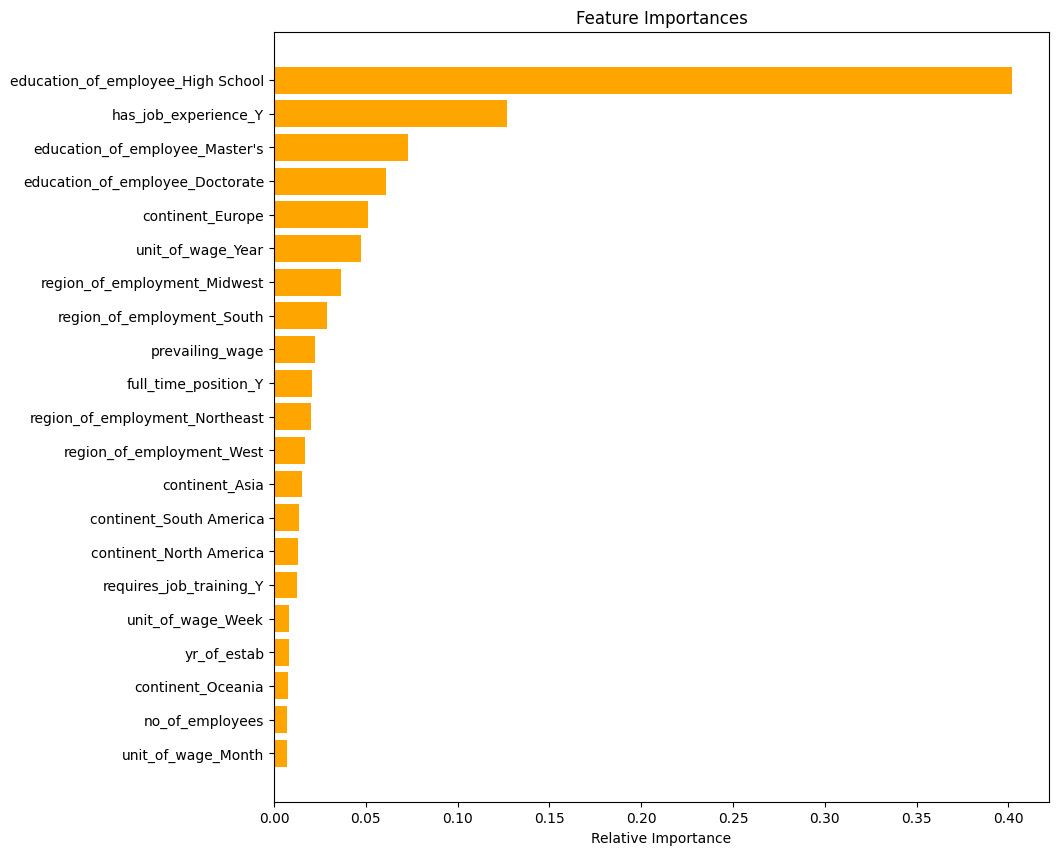

In [ ]:
feature_names = X_train.columns
importances = xgb_model_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "orange", align = "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important feature for prediction is `education_of_employee_High School` followed by `has_job_experience_Y` and `education_of_employee_Masters`

In conclusion, the education level of applicants is very important in predicting whether or not their visa applicatiton gets certified or denied

## Actionable Insights and Recommendations


###INSIGHTS
*   The predictive model built can be deployed to shortlist candidates that have higher chances of a visa approval
*   Features that significantly influence case status: Education level and Job Experience

*   Education level: Applicants with higher levels of education are certified more which is logical because of their qualifications
*   Job Experience: Applicants with previous work experience are also more likely to be certified.

*   Continents: About 66% of all the applicants in the dataset are from Asia. The continent with the highest proportion of certified visas is Europe and the continent with the highest proportion of denied visas is South America
*   Unit of wage: Applicants on a yearly wage are more likely to be certified
* Prevailing wage: On average, applicants with higher prevailing wages are more likely to be certified


*   In conclusion, Applicants with higher levels of education, previous job experience, a yearly wage and are European have a high chance of visa approval.


###RECOMMENDATIONS
To make even better predictions, information like Educational field of the applicants, years of job experience (if any), age and so on could be provided.





